In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns 
sns.set_style("darkgrid")

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
women=pd.read_csv("gender_submission.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data description:

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file   
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)   
- Name - Name 
- Sex - Sex  
- Age - Age  
- Sibsp - Number of Siblings/Spouses Aboard  
- Parch - Number of Parents/Children Aboard   
- Ticket - Ticket Number   
- Fare - Passenger Fare   
- Cabin - Cabin   
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  


In [3]:
all_data = pd.concat([train,test], axis = 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
col = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex', 'Survived']

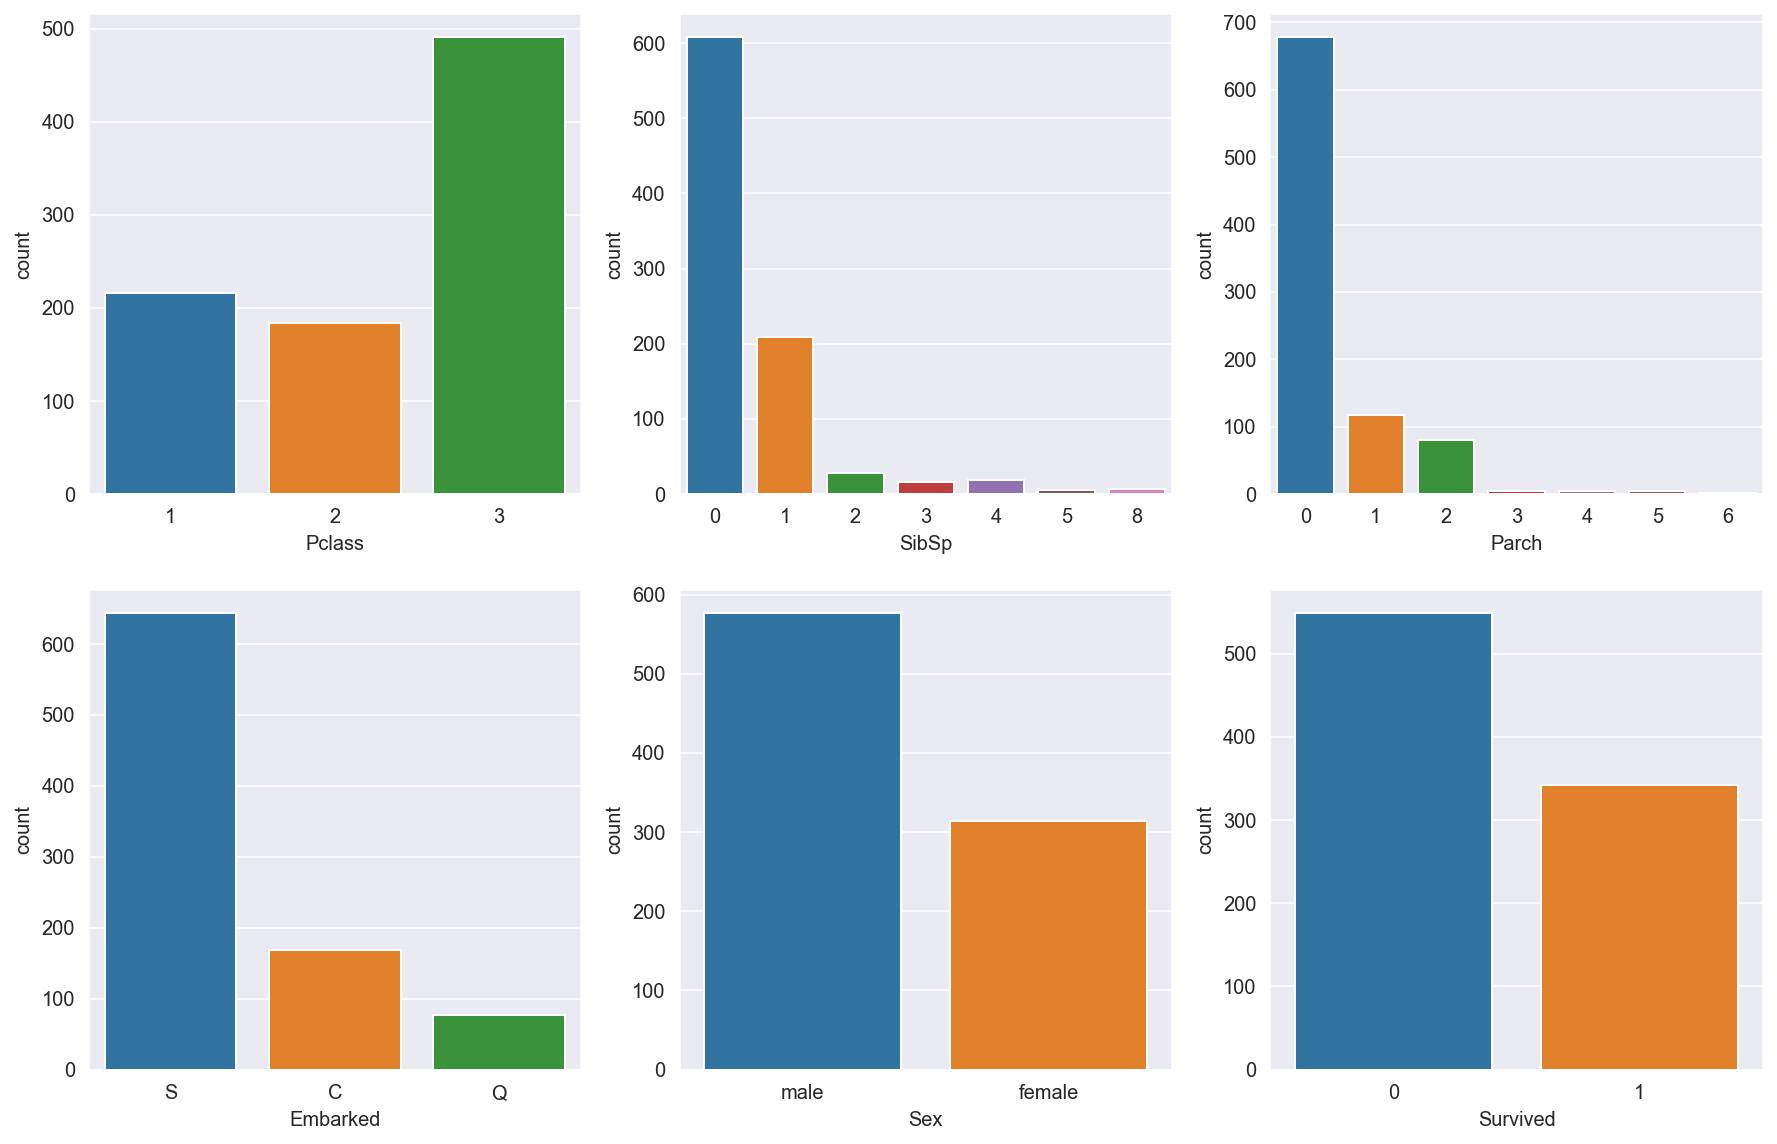

In [32]:
plt.figure(figsize=(15,15))
col = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex', 'Survived']

for i, col in enumerate(col):
    plt.subplot(3,3, i+1)
    sns.countplot(x=col, data=train);
    


In [7]:
train["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [8]:
train.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


- Most of the passengers were class 3rd   
- Most of them were traveling alone.  
- They were male more than female about 2 times.      
- Most of them embarked at 'Southampton' port.     
- Unfortunately they have survived less than pass away. 

In [10]:
all_data


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [25]:
median=all_data.Age.median()
all_data.Age.replace(np.nan,median,inplace=True)
all_data.Fare.replace(np.nan,0,inplace=True)


In [28]:
all_data.Age  

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
413    28.75
414    39.00
415    38.50
416    28.75
417    28.75
Name: Age, Length: 1309, dtype: float64

# Binary Analysis 

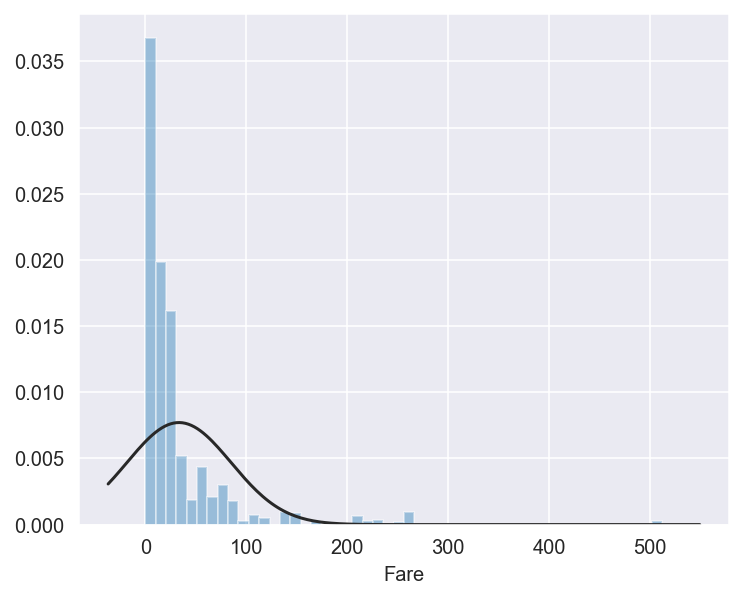

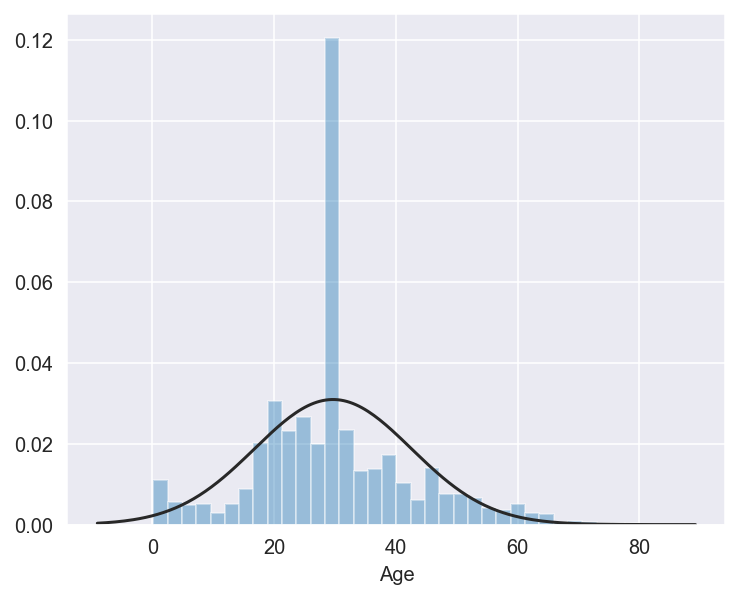

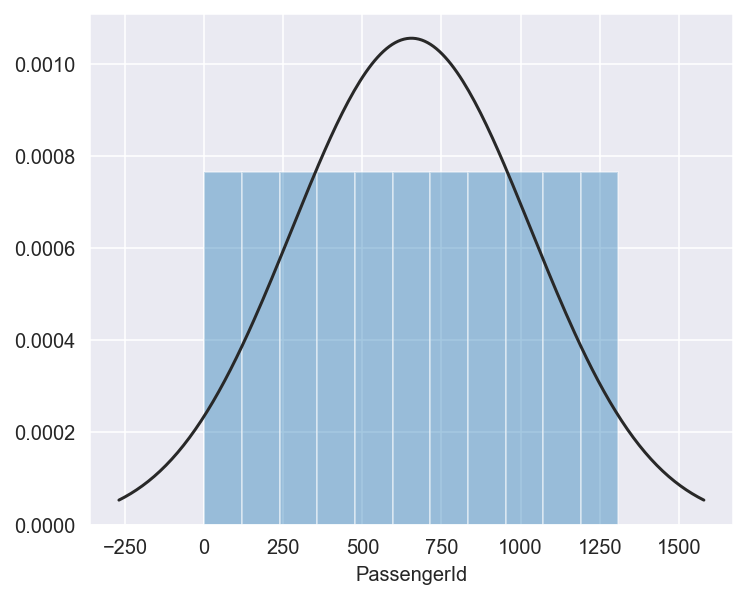

In [75]:
col=["Fare","Age","PassengerId"]
#for i , col in enumerate(col):
for col in col:
    plt.figure(figsize=(15,12))
    plt.subplot(3,3,i+1)
    sns.distplot(all_data[col],kde=False,fit=norm)
   

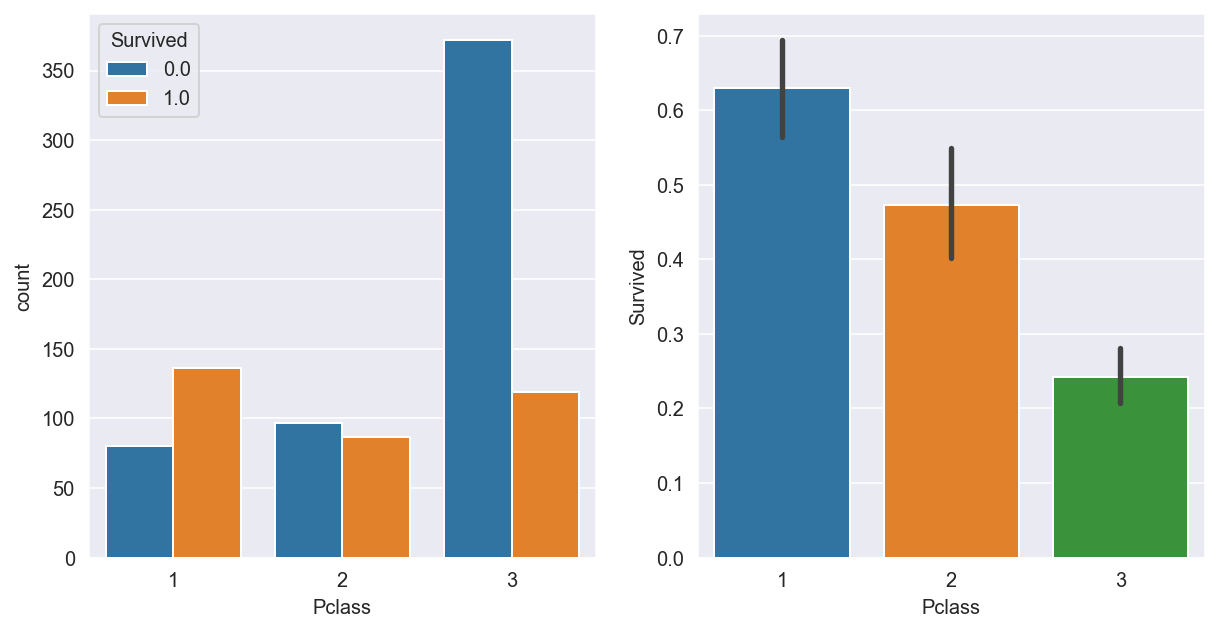

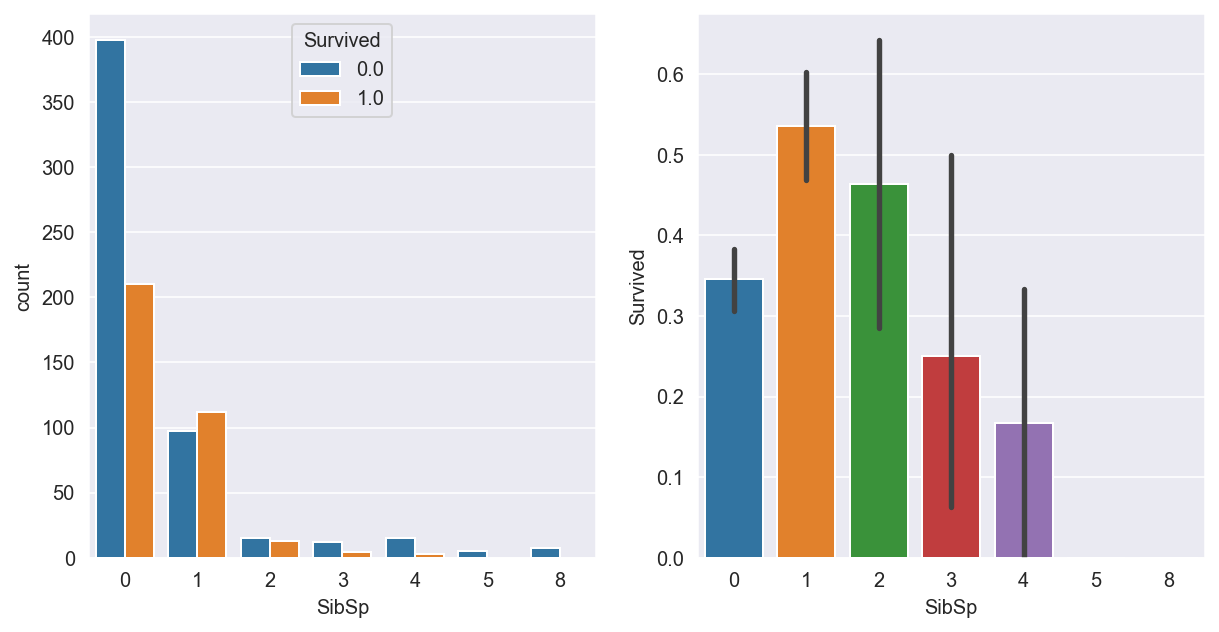

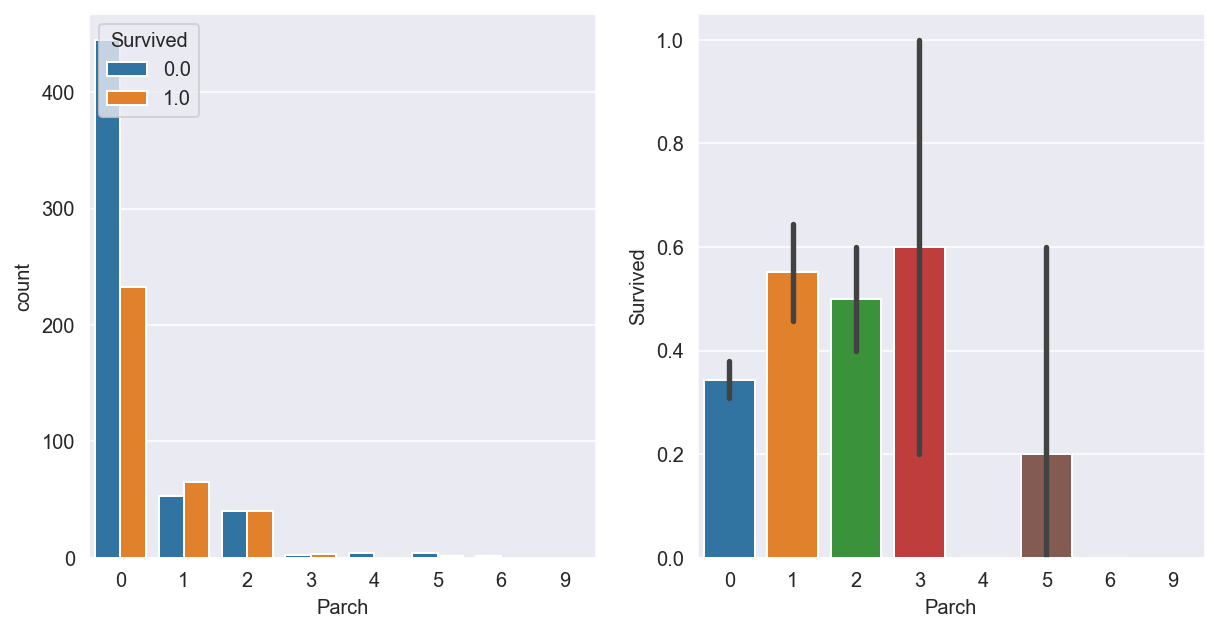

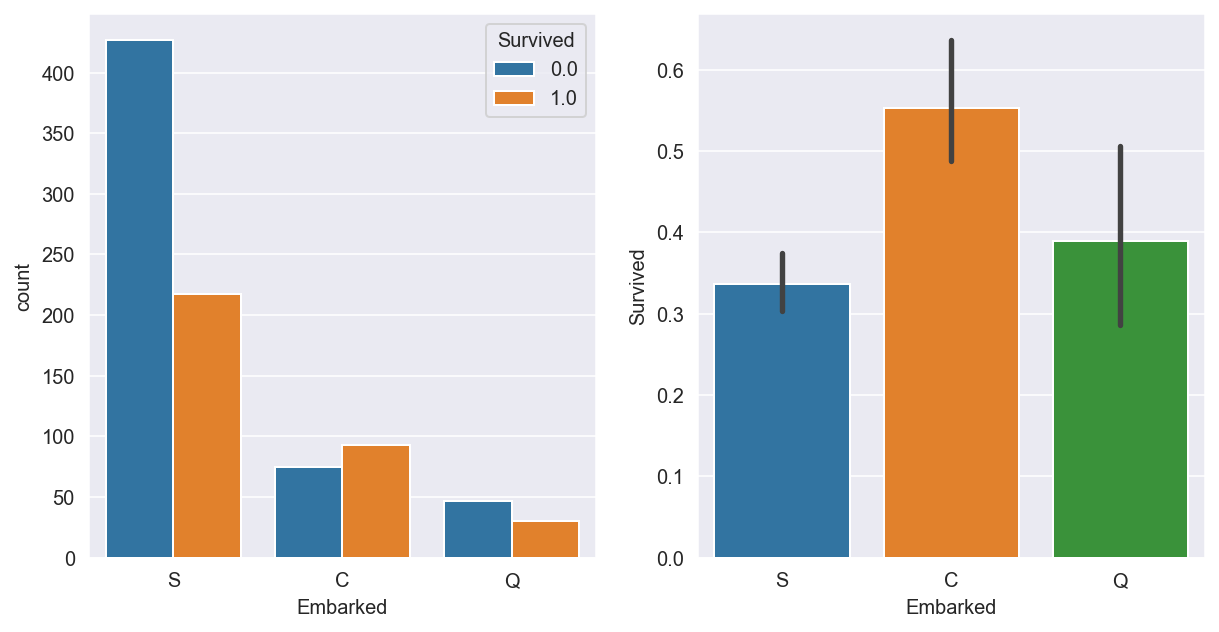

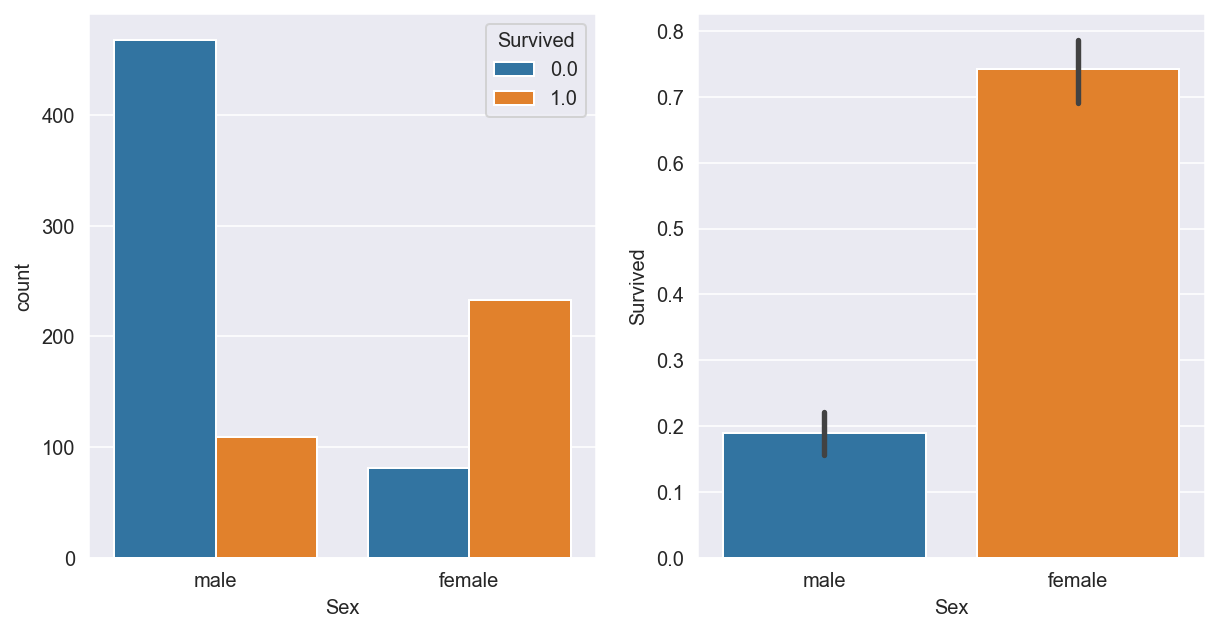

In [96]:
col = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']
for col in col:
    f,ax = plt.subplots(1,2,figsize=(10,5))
    sns.countplot(x=col, hue="Survived", data=all_data, ax=ax[0])
    sns.barplot(x=col, y="Survived", data=all_data, ax=ax[1])
    #plt.tight_layout(pad=1);
   

# Comments

- 1st class has the highest survived rate followed by 2nd and 3rd respectively,   
- it seems that  1st class passenger might have had priority to help first.  
- For passengers who came with friends or family just 1 to 2 they tend to get the more survived rate   
- and then the survived rate will go down if friends or family more than 2.  
- Passenger who embarked from 'Cherbourg' they have more survived than the others so we will deep down to get more detail.  
- Apparently, the survival rate of females higher than males. 

  

In [99]:
all_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.672208,33.270043,0.385027,655.000000,2.294882,0.498854,0.383838
std,12.889336,51.747063,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.750000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000
